## 인공지능 프로그래밍
### 24주차 (2019.7.12)
---
# 이미지 처리

<img src='lucy.png' /><br>
<img src='lucy2.jpg' />

### 이미지 다운로드
- http://github.com/gubosd/lecture4
- lucy.png
- 다운로드 후 현재 작업 폴더로 옮기기

### irfanview 설치
- http://www.irfanview.com
- 홈페이지 하단 64bit 다운로드
- iview453_x64_setup.exe 실행

### lucy.png
- 199 X 186 크기
- 컬러이미지 (RGB 3채널)

### 이미지 불러오기

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
사진 = plt.imread('lucy.png')

In [3]:
사진.shape

(186, 199, 3)

- 높이 : 186
- 폭 : 199
- 색상 : 3개 (빨강, 녹색, 파랑)

In [43]:
사진.min(), 사진.max()

(0.0, 1.0)

- 값의 최대값은 1, 최소값은 0

### 이미지 출력

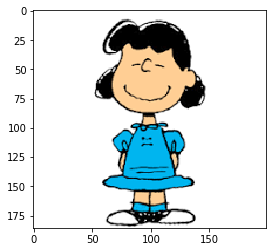

In [4]:
plt.imshow(사진)

### 사진 불러오기

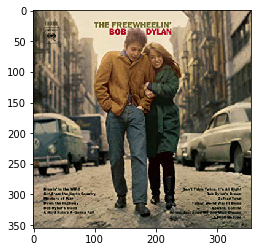

In [2]:
밥딜런 = plt.imread('bob_dylan.jpg')
plt.imshow(밥딜런)

In [5]:
밥딜런.min(), 밥딜런.max(), 밥딜런.shape

(0, 255, (355, 355, 3))

### 색상별로 분리하여 출력하기
- 출력하고자 하는 범위를 지정할 수 있다.
- 사진[폭범위, 높이범위, 색상]
- 색상은 빨강이 0, 녹색이 1, 파랑이 2 이다.
- cmap 옵션은 화면 출력시 색상표를 지정한다.

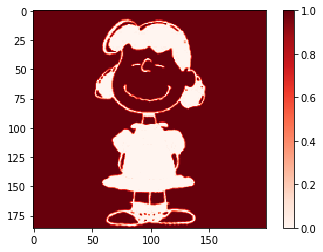

In [24]:
plt.imshow(사진[:, :, 0], cmap='Reds')
plt.colorbar()

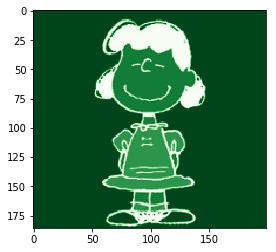

In [15]:
plt.imshow(사진[:, :, 1], cmap='Greens')

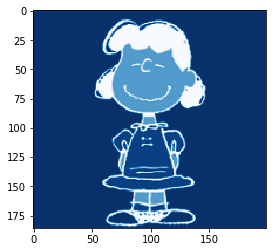

In [14]:
plt.imshow(사진[:, :, 2], cmap='Blues')

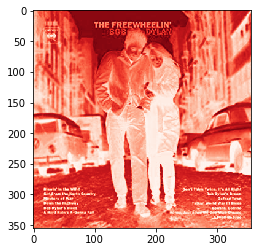

In [6]:
plt.imshow(밥딜런[:,:,0], cmap='Reds')

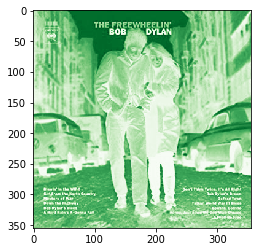

In [7]:
plt.imshow(밥딜런[:,:,1], cmap='Greens')

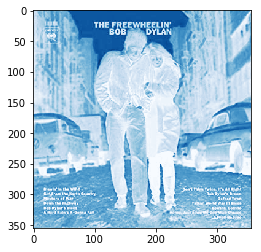

In [8]:
plt.imshow(밥딜런[:,:,2], cmap='Blues')

### 회색 이미지로 바꾸기

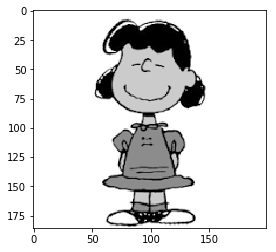

In [62]:
사진2 = 사진.mean(axis=2)
plt.imshow(사진2, cmap='gray')

### 한가지 색상값을 키우기
- 녹색값을 2배로 키워보자.

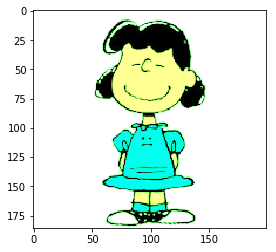

In [61]:
사진3 = 사진.copy()

사진3[:,:,1] = 사진3[:,:,1] * 2 # 1은 녹색
사진3[사진3>1] = 1

plt.imshow(사진3)

### 한가지 색상을 빼기
- 파란색값을 모두 0 으로 바꾼다.

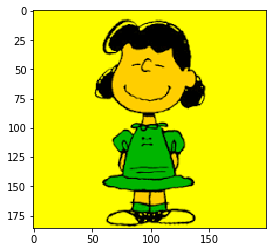

In [132]:
사진3 = 사진.copy()
사진3[:,:,2] = 0

plt.imshow(사진3)

### 일부 영역 색상값을 변경하기
- 사진2[20:-20, 20:-20, :] 에서 '20:-20' 은 20번째 점부터 마지막 20번째 점까지 라는 의미이다.
- 사진2[20:166, 20:179, :] 와 같은 의미이다.
- 원래 값에 0.5 를 곱해주면 색이 어두워진다.

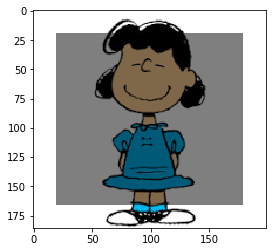

In [64]:
사진4 = 사진.copy()

사진4[20:-20, 20:-20, :] = 사진4[20:-20, 20:-20, :] * 0.5

plt.imshow(사진4)

- 위의 영역에서 빨간색만 감소시켜 보자.

In [ ]:
밥딜런.astype

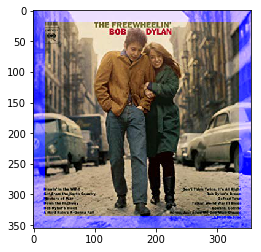

In [23]:
#밥딜런2 = (밥딜런*0.5).astype('int')
밥딜런2 = 밥딜런.copy()
밥딜런2[:,:,2] = 255

밥딜런2[20:-20, 20:-20, :] = 밥딜런[20:-20, 20:-20, :]

plt.imshow(밥딜런2)

### 이미지 잘라내기

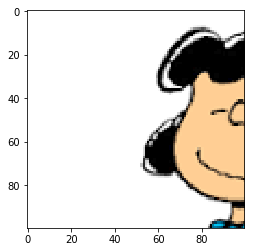

In [26]:
plt.imshow(사진[:100,:100])

- 루시의 얼굴 부분을 잘라내 보자.

### 이미지를 흐릿하게 만들기 (블러 효과)

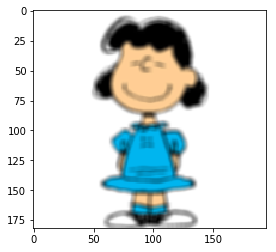

In [65]:
# 186*199
크기 = 5
사진5 = np.ones([186-크기+1,199-크기+1,3])

for i in range(186-크기+1):
    for j in range(199-크기+1):
        사진5[i,j,0] = 사진[i:i+크기, j:j+크기,0].mean()
        사진5[i,j,1] = 사진[i:i+크기, j:j+크기,1].mean()
        사진5[i,j,2] = 사진[i:i+크기, j:j+크기,2].mean()
        
plt.imshow(사진5)

### 사진 필터를 적용해 보자

- 흔들림

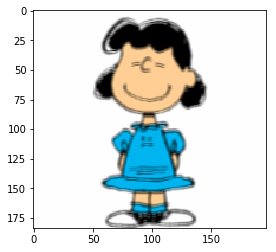

In [126]:
# 186*199
크기 = 3
필터 = np.array([[1,1,1], [0,0,0], [1,1,1]])/6
사진7 = np.zeros([186-크기+1,199-크기+1,3])

for i in range(186-크기+1):
    for j in range(199-크기+1):
        사진7[i,j,0] = (사진[i:i+크기, j:j+크기,0]*필터).sum()
        사진7[i,j,1] = (사진[i:i+크기, j:j+크기,1]*필터).sum()
        사진7[i,j,2] = (사진[i:i+크기, j:j+크기,2]*필터).sum()
        
plt.imshow(사진7)

- sharpenning

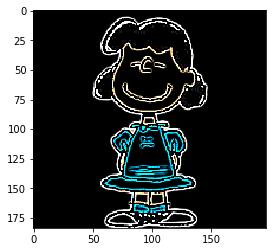

In [124]:
# 186*199
크기 = 3
필터 = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) # 8(외곽선), 9(샤프닝), 12, 17
사진7 = np.zeros([186-크기+1,199-크기+1,3])

for i in range(186-크기+1):
    for j in range(199-크기+1):
        사진7[i,j,0] = (사진[i:i+크기, j:j+크기,0]*필터).sum()
        사진7[i,j,1] = (사진[i:i+크기, j:j+크기,1]*필터).sum()
        사진7[i,j,2] = (사진[i:i+크기, j:j+크기,2]*필터).sum()
        
사진7[사진7>1] = 1
사진7[사진7<0] = 0
plt.imshow(사진7)

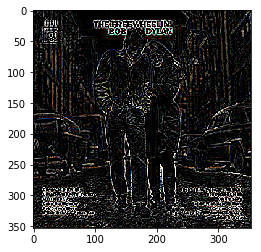

In [27]:
# 186*199
크기 = 3
필터 = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) # 8(외곽선), 9(샤프닝), 12, 17
밥딜런3 = np.zeros([355-크기+1,355-크기+1,3], dtype=int)

for i in range(355-크기+1):
    for j in range(355-크기+1):
        밥딜런3[i,j,0] = (밥딜런[i:i+크기, j:j+크기,0]*필터).sum()
        밥딜런3[i,j,1] = (밥딜런[i:i+크기, j:j+크기,1]*필터).sum()
        밥딜런3[i,j,2] = (밥딜런[i:i+크기, j:j+크기,2]*필터).sum()
        
밥딜런3[밥딜런3>255] = 255
밥딜런3[밥딜런3<0] = 0

plt.imshow(밥딜런3)

- 부드럽게 하기

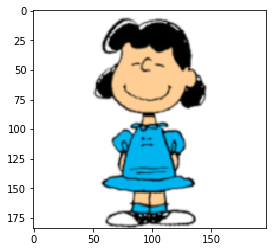

In [112]:
# 186*199
크기 = 3
필터 = np.array([[1,3,1], [3,9,3], [1,3,1]])/25
사진7 = np.zeros([186-크기+1,199-크기+1,3])

for i in range(186-크기+1):
    for j in range(199-크기+1):
        사진7[i,j,0] = (사진[i:i+크기, j:j+크기,0]*필터).sum()
        사진7[i,j,1] = (사진[i:i+크기, j:j+크기,1]*필터).sum()
        사진7[i,j,2] = (사진[i:i+크기, j:j+크기,2]*필터).sum()
        
plt.imshow(사진7)

- emboss 필터

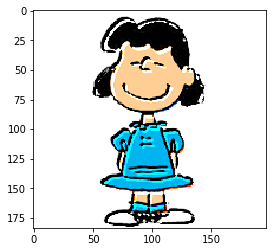

In [106]:
# 186*199
크기 = 3
필터 = np.array([[-2,0,0], [0,1,0], [0,0,2]])
사진7 = np.zeros([186-크기+1,199-크기+1,3])

for i in range(186-크기+1):
    for j in range(199-크기+1):
        사진7[i,j,0] = (사진[i:i+크기, j:j+크기,0]*필터).sum()
        사진7[i,j,1] = (사진[i:i+크기, j:j+크기,1]*필터).sum()
        사진7[i,j,2] = (사진[i:i+크기, j:j+크기,2]*필터).sum()
        
사진7[사진7>1] = 1
사진7[사진7<0] = 0
plt.imshow(사진7)

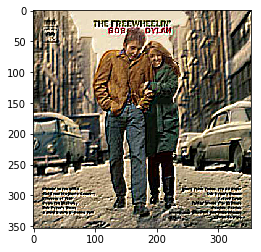

In [29]:
# 186*199
크기 = 3
필터 = np.array([[-2,0,0], [0,1,0], [0,0,2]])
밥딜런5 = np.zeros([355-크기+1,355-크기+1,3], dtype=int)

for i in range(355-크기+1):
    for j in range(355-크기+1):
        밥딜런5[i,j,0] = (밥딜런[i:i+크기, j:j+크기,0]*필터).sum()
        밥딜런5[i,j,1] = (밥딜런[i:i+크기, j:j+크기,1]*필터).sum()
        밥딜런5[i,j,2] = (밥딜런[i:i+크기, j:j+크기,2]*필터).sum()
        
밥딜런5[밥딜런5>255] = 255
밥딜런5[밥딜런5<0] = 0

plt.imshow(밥딜런5)

### 필름 이미지 만들기 (네거티브 이미지)
- 0 을 1로, 1을 0으로 바꾼다. (어두운 것은 밝게, 밝은 것은 어둡게)

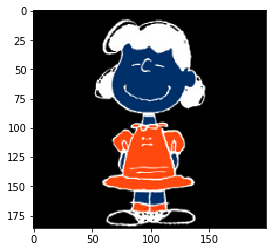

In [88]:
plt.imshow(1-사진)

- 색번짐 테스트

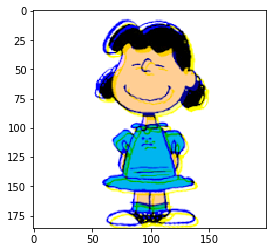

In [119]:
사진8 = np.ones([186,199,3])
사진8[:,:,0] = 사진[:,:,0]
사진8[:,:,1] = 사진[:,:,1]
사진8[3:,3:,2] = 사진[:-3,:-3,2]

plt.imshow(사진8)

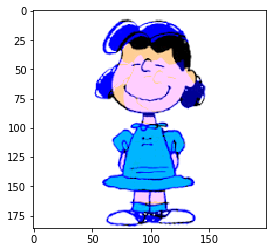

In [123]:
사진8 = 사진.copy()
사진8[10:,10:,2] += 사진[:-10,:-10,2]
사진8[사진8>1] = 1

plt.imshow(사진8)

- 별모양 필터 테스트

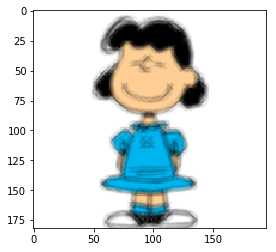

In [130]:
# 186*199
크기 = 5
필터 = np.array([[1,0,0,0,1], [0,1,0,1,0], [0,0,1,0,0], [0,1,0,1,0], [1,0,0,0,1]])/9
사진7 = np.zeros([186-크기+1,199-크기+1,3])

for i in range(186-크기+1):
    for j in range(199-크기+1):
        사진7[i,j,0] = (사진[i:i+크기, j:j+크기,0]*필터).sum()
        사진7[i,j,1] = (사진[i:i+크기, j:j+크기,1]*필터).sum()
        사진7[i,j,2] = (사진[i:i+크기, j:j+크기,2]*필터).sum()
        
plt.imshow(사진7)

### 이미지 만들기

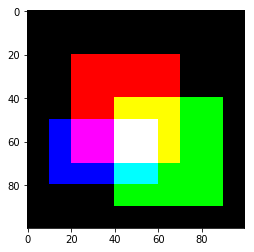

In [9]:
그림 = np.zeros([100,100,3])

그림[20:70, 20:70, 0] = 1
그림[40:90, 40:90, 1] = 1
그림[50:80, 10:60, 2] = 1

plt.imshow(그림)

In [6]:
plt.imsave('test.jpg', 그림)

### 밤하늘 그리기

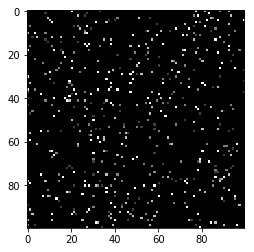

In [43]:
p0 = 0.95
그림2 = np.random.choice(5,[100,100],p=[p0, (1-p0)/4, (1-p0)/4, (1-p0)/4, (1-p0)/4])
#그림2[그림2<0.9] = 0

plt.imshow(그림2, vmin=0.0, vmax=4.0, cmap='gray')

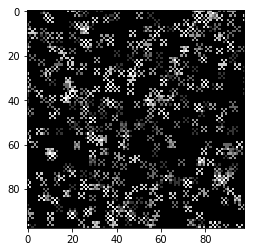

In [45]:
#크기 = 5
#필터 = np.array([[1,0,0,0,1], [0,1,0,1,0], [0,0,1,0,0], [0,1,0,1,0], [1,0,0,0,1]])/9
크기 = 3
필터 = np.array([[1,0,1], [0,1,0], [1,0,1]])/5
그림3 = np.zeros([100-크기+1,100-크기+1])

for i in range(100-크기+1):
    for j in range(100-크기+1):
        그림3[i,j] = (그림2[i:i+크기, j:j+크기]*필터).sum()
        
plt.imshow(그림3, vmin=0.0, vmax=1.0, cmap='gray')